IMPORTING DATA AND PACKAGES

In [1]:
#importing data for review table in yelp dataset
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
review = pd.read_csv("/content/drive/My Drive/data/review.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INITIAL PREPROCESSING

In [2]:
review.head()

,funny,review_id,date,useful,cool,user_id,business_id,text,stars
0,0,KU_O5udG6zpxOg-VcAEodg,2018-07-07 22:09:11,0,0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0
1,0,BiTunyQ73aT9WBnpR9DZGw,2012-01-03 15:28:18,1,1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5.0
2,0,saUsX_uimxRlCVr67Z4Jig,2014-02-05 20:30:30,0,0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0
3,0,AqPFMleE6RsU23_auESxiA,2015-01-04 00:01:03,1,1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0
4,0,Sx8TMOWLNuJBWer-0pcmoA,2017-01-14 20:54:15,1,1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4.0


Initial assement of the data:
1. the primary feature in this dataset is the stars and the review text that is provided.
2. business_id and user_id can be retained for merging the data tables
3. features like funny do not pertain to our use case
4. review ID seems irrelevent 

In [3]:
# due to RAM contstraints the first 1000 entries from the vast dataset is taken for initial evaluation
r = review.iloc[:1000,:]
#removing unnecessary columns
r = r.drop(['review_id','funny'], axis=1)
r.head()

,date,useful,cool,user_id,business_id,text,stars
0,2018-07-07 22:09:11,0,0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0
1,2012-01-03 15:28:18,1,1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5.0
2,2014-02-05 20:30:30,0,0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0
3,2015-01-04 00:01:03,1,1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0
4,2017-01-14 20:54:15,1,1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4.0


In [4]:
r.isnull().sum()

date           0
useful         0
cool           0
user_id        0
business_id    0
text           0
stars          0
dtype: int64

In [5]:
r.dtypes

date            object
useful           int64
cool             int64
user_id         object
business_id     object
text            object
stars          float64
dtype: object

Assessment:
1. there are no null values to be dealt with
2. date, user_id, business_id and text are object data types that need to be converted to numerical

In [6]:
#removing the time stamp in the dates column as it is unecessary
date = r.date.str.split(expand=True)

In [7]:
date.head()

,0,1
0,2018-07-07,22:09:11
1,2012-01-03,15:28:18
2,2014-02-05,20:30:30
3,2015-01-04,00:01:03
4,2017-01-14,20:54:15


In [8]:
r.insert(2, 'dates', date[0])

In [9]:
r = r.drop("date",axis =1)

In [10]:
r.head()

,useful,dates,cool,user_id,business_id,text,stars
0,0,2018-07-07,0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0
1,1,2012-01-03,1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5.0
2,0,2014-02-05,0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0
3,1,2015-01-04,1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0
4,1,2017-01-14,1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4.0


In [17]:
# extracting the year as a column to see data insights
r['year'] = pd.DatetimeIndex(r['dates']).year
r.head()

,useful,dates,cool,user_id,business_id,text,stars,year
0,0,2018-07-07,0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0,2018
1,1,2012-01-03,1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5.0,2012
2,0,2014-02-05,0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0,2014
3,1,2015-01-04,1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0,2015
4,1,2017-01-14,1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4.0,2017


EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'number of useful reviews')

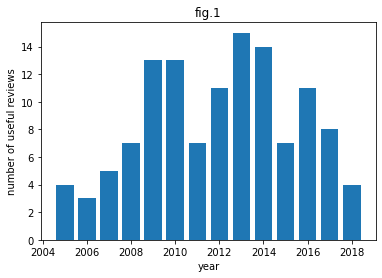

In [44]:
#correlation of useful and year columns
import matplotlib.pyplot as plt
plt.bar(r['year'],r['useful'])
plt.title('fig.1')
plt.xlabel('year')
plt.ylabel('number of useful reviews')

Text(0, 0.5, 'number of useful ratings')

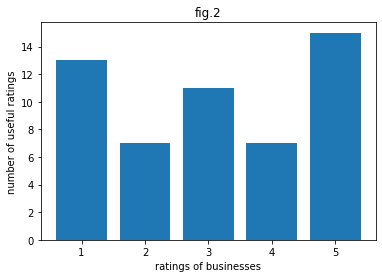

In [45]:
#relation between ratings and the usefulness
plt.bar(r['stars'],r['useful'])
plt.title('fig.2')
plt.xlabel('ratings of businesses')
plt.ylabel('number of useful ratings')

Text(0, 0.5, 'number of useful ')

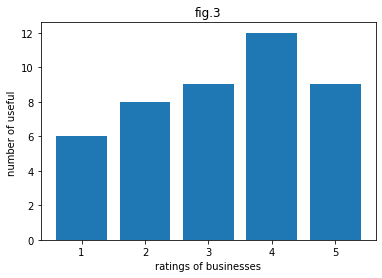

In [46]:
#relation between rating and reviews that are marked as cool
plt.bar(r['stars'],r['cool'])
plt.title('fig.3')
plt.xlabel('ratings of businesses')
plt.ylabel('number of useful ')

Assessment:
1. fig.1 - reviews that are before 2008 and after 2017 are the least useful reviews with the reviews in the years between being most useful. 
2. fig.2 - five star and one star reviews are flagged as most useful
3. the feature cool does not seem to offer much significance 
4. features year and useful can be retained for the time being



In [47]:
r = r.drop(['cool'],axis=1)
r.head()

,useful,dates,user_id,business_id,text,stars,year
0,0,2018-07-07,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0,2018
1,1,2012-01-03,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5.0,2012
2,0,2014-02-05,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0,2014
3,1,2015-01-04,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0,2015
4,1,2017-01-14,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4.0,2017


In [12]:
#importing data for user table in yelp dataset
user = pd.read_csv("/content/drive/My Drive/data/user.csv")

In [14]:
u = user.iloc[:1000,:]
u.head()

,user_id,friends,name,review_count,compliment_cute,compliment_funny,funny,compliment_photos,compliment_hot,compliment_more,...,compliment_list,fans,useful,cool,yelping_since,compliment_note,elite,compliment_profile,compliment_cool,compliment_writer
0,qVc8ODYU5SZjKXVBgXdI7w,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",Walker,585,56,467,1259,180,250,65,...,18,267,7217,5994,2007-01-25 16:47:26,232,2007,55,467,239
1,j14WgRoU_-2ZE1aw1dXrJg,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",Daniel,4333,157,3131,13066,1946,1145,264,...,251,3138,43091,27281,2009-01-25 04:35:42,1847,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",184,3131,1521
2,2WnXYQFK0hXEoTxPtV2zvg,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",Steph,665,17,119,1010,18,89,13,...,3,52,2086,1003,2008-07-25 10:41:00,66,"2009,2010,2011,2012,2013",10,119,35
3,SZDeASXq7o05mMNLshsdIA,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",Gwen,224,6,26,330,9,24,4,...,2,28,512,299,2005-11-29 04:38:33,12,"2009,2010,2011",1,26,10
4,hA5lMy-EnncsH4JoR-hFGQ,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",Karen,79,0,0,15,0,1,1,...,0,1,29,7,2007-01-05 19:40:59,1,NaN,0,0,0


Initial assessment of the data:
1. the data provides the statistics if each user
2. the friends feature can maybe be used as an input for collaborative filtering and suggestions
3. the user statistcs can be used to filter out how popular the reviews of the user are

Text(0.5, 1.0, 'fig.4')

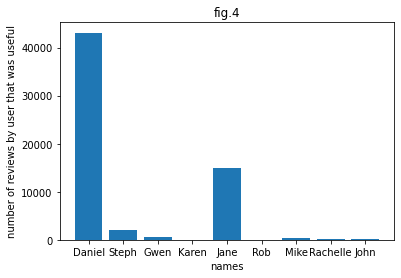

In [49]:
x = u['name']
y = u['useful']
x = x[1:10]
y = y[1:10]
plt.bar(x,y)
plt.xlabel('names')
plt.ylabel('number of reviews by user that was useful')
plt.title('fig.4')

Assessment:
1. from comparing the two features of names and usefulness for ten people daniel and jane give more useful reviews
2. similarly the other features can be combined to score the reviewers based on the compliments, their review count etc.

FUTURE WORK/PIPELINE:

1. In both review table and user table NLP needs to be employed to filter out the reviews for restaurants alone
2. reviewers can be scored as based on the user table
3. review and buisness table can be combined after this preprocessing using business_id as the merge column
4. users alog with their score can be added to this merged table using user id as merge point
5. From the merged table further feature selection needs to be performed
6. KNN has been fitted to the data initially, further models/neural networks can be fitted to the data
7. accuracy tuning needs to be carried out 